In [26]:
import tensorflow as tf
import tensorflow_datasets as tf_df

# Download Dataset and Preprocess the data

In [27]:
Buffer_SIZE = 70_000
BATCH_SIZE = 128
NUM_EPOCHS = 20

In [28]:
mnist_dataset,mnist_info = tf_df.load(name='mnist',with_info = True,as_supervised = True)

In [29]:
mnist_train,mnist_test = mnist_dataset['train'],mnist_dataset['test']

In [30]:
def scale(image , label):
    image = tf.cast(image,tf.float32)
    image/=255
    return image,label

In [31]:
train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [32]:
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples

In [33]:
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

In [34]:
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [35]:
train_and_validation_data = train_and_validation_data.shuffle(Buffer_SIZE)

In [36]:
train_data = train_and_validation_data.skip(num_validation_samples)

In [37]:
validation_data = train_and_validation_data.take(num_validation_samples)

In [38]:
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

# Create the model and training it

In [39]:
# layers will come one after the other
model= tf.keras.Sequential([
 # first one is the convlution one
 tf.keras.layers.Conv2D(50,5,activation='relu',input_shape=(28,28,1)),
 #second one will be MaxPool to compress image
 tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
 #third one will repeated from first two layers
 tf.keras.layers.Conv2D(50,3,activation='relu'),
 tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
 # flatten the result
 tf.keras.layers.Flatten(),
 # Dense for the ouput [In this I will use softmax as an activation function]
 tf.keras.layers.Dense(10)   
])

In [40]:
# showing summary of the model
model.summary(line_length = 75)

Model: "sequential_1"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d_2 (Conv2D)               (None, 24, 24, 50)            1300        
                                                                           
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 50)            0           
                                                                           
 conv2d_3 (Conv2D)               (None, 10, 10, 50)            22550       
                                                                           
 max_pooling2d_3 (MaxPooling2D)  (None, 5, 5, 50)              0           
                                                                           
 flatten_1 (Flatten)             (None, 1250)                  0           
                                                                           
 dense_1 (Dense)                 (None, 10)                    125

In [41]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [42]:
model.compile(optimizer = 'adam',loss = loss_fn,metrics=['accuracy'])

In [43]:
#handling overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode = 'auto',
    min_delta=0,
    patience=2,
    verbose=0,
    restore_best_weights=True
)

In [44]:
model.fit(
    train_data,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    validation_data = validation_data,
    verbose = 2
)

Epoch 1/20
422/422 - 25s - loss: 0.2709 - accuracy: 0.9220 - val_loss: 0.1089 - val_accuracy: 0.9698 - 25s/epoch - 59ms/step
Epoch 2/20
422/422 - 24s - loss: 0.0720 - accuracy: 0.9788 - val_loss: 0.0655 - val_accuracy: 0.9803 - 24s/epoch - 56ms/step
Epoch 3/20
422/422 - 24s - loss: 0.0518 - accuracy: 0.9845 - val_loss: 0.0478 - val_accuracy: 0.9845 - 24s/epoch - 56ms/step
Epoch 4/20
422/422 - 23s - loss: 0.0422 - accuracy: 0.9874 - val_loss: 0.0325 - val_accuracy: 0.9910 - 23s/epoch - 55ms/step
Epoch 5/20
422/422 - 25s - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0274 - val_accuracy: 0.9902 - 25s/epoch - 60ms/step
Epoch 6/20
422/422 - 23s - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0261 - val_accuracy: 0.9940 - 23s/epoch - 55ms/step
Epoch 7/20
422/422 - 24s - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0235 - val_accuracy: 0.9942 - 24s/epoch - 56ms/step
Epoch 8/20
422/422 - 25s - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0219 - val_accuracy: 0.9928 - 25s/epoch - 60ms/step


# Testing model

In [45]:
# test model
test_loss,test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.0310 - accuracy: 0.9906


In [46]:
# printing the accuracy
print('Test loss : {0: .4f}. Test accuracy : {1: .2f}%'.format(test_loss , test_accuracy*100.))

Test loss :  0.0310. Test accuracy :  99.06%


# Plotting for images and results

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
#Split the test_data into 2 arrays containing the images and the corresponding labels
for images , labels in test_data.take(1):
    images_test = images.numpy()
    labels_test = labels.numpy()

#Reshape the images into 28x28 form , suitable for matplotlib    
images_plot = np.reshape(images_test,(10000,28,28))

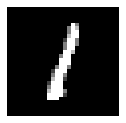

label:1


In [68]:
# The image to be displayed and tested => Enter any number you want to see
i = 10

#plot the images
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(images_plot[i-1], cmap="gray", aspect = 'auto')
plt.show()

print("label:{}".format(labels_test[i - 1]))

1/1 [==============================] - 0s 33ms/step


<BarContainer object of 10 artists>

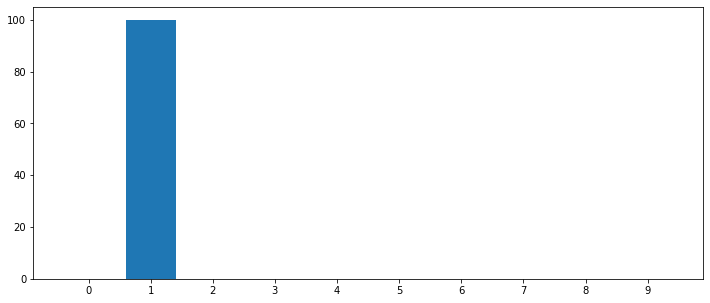

In [69]:
# obtain the model's predictions
predictions = model.predict(images_test[i-1:i])
#convert predictions into probabilities
probabilities = tf.nn.softmax(predictions).numpy()
# convert probabilities into precentage
probabilities = probabilities*100

#create a bar chart to plot the probabilities for each class
plt.figure(figsize=(12,5))
plt.bar(x=[1,2,3,4,5,6,7,8,9,10] , height = probabilities[0],tick_label=["0","1","2","3","4","5","6","7","8","9"])